# Pandas

## Series

In [1]:
import numpy as np
import pandas as pd

In [9]:
labels = ['A', 'B', 'C']
l = [10, 20, 30]
arr = np.array(l)
d = {'a': 10, 'b': 20, 'c': 30}

In [6]:
pd.Series(l)

0    10
1    20
2    30
dtype: int64

In [7]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [111]:
my_series = pd.Series(data=[1, 2, 3, 4], index='A B C D'.split())

In [114]:
my_series[::]

A    1
B    2
C    3
D    4
dtype: int64

In [11]:
pd.Series(data=[1, 'a', 0.5])

0      1
1      a
2    0.5
dtype: object

In [130]:
s1 = pd.Series(data=[1, 2, 3], index=['A', 'B', 'C'])
s2 = pd.Series(data=[4, 5, 6, 7], index=['A', 'B', 'D', 'E'])
print(s1, '\n')
print(s2)

A    1
B    2
C    3
dtype: int64 

A    4
B    5
D    6
E    7
dtype: int64


In [131]:
(s1 + s2)

A    5.0
B    7.0
C    NaN
D    NaN
E    NaN
dtype: float64

## DataFrame

In [151]:
pd.DataFrame(data=np.arange(1, 10).reshape(3, 3),
             columns=list('ABC'),
             index=list('XYZ'))

,A,B,C
X,1,2,3
Y,4,5,6
Z,7,8,9


In [152]:
rng = np.random.default_rng(42)
m = rng.standard_normal((5, 4))
m

array([[ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951,  0.1278404 , -0.31624259],
       [-0.01680116, -0.85304393,  0.87939797,  0.77779194],
       [ 0.0660307 ,  1.12724121,  0.46750934, -0.85929246],
       [ 0.36875078, -0.9588826 ,  0.8784503 , -0.04992591]])

In [153]:
df = pd.DataFrame(data=m, index='A B C D E'.split(), columns='W X Y Z'.split())
df

,W,X,Y,Z
A,0.304717,-1.039984,0.750451,0.940565
B,-1.951035,-1.302180,0.127840,-0.316243
C,-0.016801,-0.853044,0.879398,0.777792
D,0.066031,1.127241,0.467509,-0.859292
E,0.368751,-0.958883,0.878450,-0.049926


In [188]:
df.loc[::, 'new_new_col'] = df.loc[::, 'X'] + df.loc[::, 'Y']

In [200]:
df.drop(labels='new_col new_new_col'.split(), axis=1, inplace=True)

In [209]:
df[df > 0]

,W,X,Y,Z
A,0.304717,NaN,0.750451,0.940565
B,NaN,NaN,0.127840,NaN
C,NaN,NaN,0.879398,0.777792
D,0.066031,1.127241,0.467509,NaN
E,0.368751,NaN,0.878450,NaN


In [219]:
df.loc['A', 'X'] = 1

In [237]:
crit = df > 0
df[crit].dropna(axis='index')

,W,X,Y,Z
A,0.304717,1.0,0.750451,0.940565


In [243]:
df.reset_index(inplace=True)

In [244]:
new_index = 'AA BB CC DD EE'.split()

In [245]:
df['new_index'] = new_index

In [246]:
df

,index,W,X,Y,Z,new_index
0,A,0.304717,1.000000,0.750451,0.940565,AA
1,B,-1.951035,-1.302180,0.127840,-0.316243,BB
2,C,-0.016801,-0.853044,0.879398,0.777792,CC
3,D,0.066031,1.127241,0.467509,-0.859292,DD
4,E,0.368751,-0.958883,0.878450,-0.049926,EE


In [247]:
df.set_index('new_index', inplace=True)

In [250]:
df.rename({'index': 'old_index'}, axis=1, inplace=True)

In [251]:
df

,old_index,W,X,Y,Z
new_index,,,,,
AA,A,0.304717,1.000000,0.750451,0.940565
BB,B,-1.951035,-1.302180,0.127840,-0.316243
CC,C,-0.016801,-0.853044,0.879398,0.777792
DD,D,0.066031,1.127241,0.467509,-0.859292
EE,E,0.368751,-0.958883,0.878450,-0.049926


In [255]:
rng = np.random.default_rng(42)
data = rng.standard_normal((5, 4))
data

array([[ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951,  0.1278404 , -0.31624259],
       [-0.01680116, -0.85304393,  0.87939797,  0.77779194],
       [ 0.0660307 ,  1.12724121,  0.46750934, -0.85929246],
       [ 0.36875078, -0.9588826 ,  0.8784503 , -0.04992591]])

In [257]:
idx = list('ABCDE')
cols = list('WXYZ')
df = pd.DataFrame(data=data, index=idx, columns=cols)
df

,W,X,Y,Z
A,0.304717,-1.039984,0.750451,0.940565
B,-1.951035,-1.302180,0.127840,-0.316243
C,-0.016801,-0.853044,0.879398,0.777792
D,0.066031,1.127241,0.467509,-0.859292
E,0.368751,-0.958883,0.878450,-0.049926


In [258]:
# Reset index to default integer position based index
df.reset_index(inplace=True)
# Rename old index
df.rename({'index': 'old_index'}, axis=1, inplace=True)
# Create data for the new index
new_index = 'AA BB CC DD EE'.split()
# Assign data to new column
df['new_index'] = new_index
# Set new index
df.set_index('new_index', inplace=True)
df

,old_index,W,X,Y,Z
new_index,,,,,
AA,A,0.304717,-1.039984,0.750451,0.940565
BB,B,-1.951035,-1.302180,0.127840,-0.316243
CC,C,-0.016801,-0.853044,0.879398,0.777792
DD,D,0.066031,1.127241,0.467509,-0.859292
EE,E,0.368751,-0.958883,0.878450,-0.049926


In [259]:
print(df)

          old_index         W         X         Y         Z
new_index                                                  
AA                A  0.304717 -1.039984  0.750451  0.940565
BB                B -1.951035 -1.302180  0.127840 -0.316243
CC                C -0.016801 -0.853044  0.879398  0.777792
DD                D  0.066031  1.127241  0.467509 -0.859292
EE                E  0.368751 -0.958883  0.878450 -0.049926


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, AA to EE
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   old_index  5 non-null      object 
 1   W          5 non-null      float64
 2   X          5 non-null      float64
 3   Y          5 non-null      float64
 4   Z          5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 240.0+ bytes


In [261]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,5.0,-0.245668,0.966727,-1.951035,-0.016801,0.066031,0.304717,0.368751
X,5.0,-0.605370,0.982686,-1.302180,-1.039984,-0.958883,-0.853044,1.127241
Y,5.0,0.620730,0.322712,0.127840,0.467509,0.750451,0.878450,0.879398
Z,5.0,0.098579,0.755301,-0.859292,-0.316243,-0.049926,0.777792,0.940565


## Missing Data with Pandas

In [287]:
series_dict = dict(A=[1, 2, np.nan], B=[5, np.nan, np.nan], C=[1, 2, 3])
df = pd.DataFrame(series_dict)
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


## Group By Operations

In [1]:
import pandas as pd

In [5]:
data = dict(Company='GOOG GOOG MSFT MSFT FB FB'.split(),
            Person='Sam Charlie Amy Vanessa Carl Sarah'.split(),
            Sales=[200, 120, 340, 124, 243, 350])
data

{'Company': ['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
 'Person': ['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
 'Sales': [200, 120, 340, 124, 243, 350]}

In [6]:
df = pd.DataFrame(data)

In [18]:
df.sort_values('Sales')

,Company,Person,Sales
1,GOOG,Charlie,120
3,MSFT,Vanessa,124
0,GOOG,Sam,200
4,FB,Carl,243
2,MSFT,Amy,340
5,FB,Sarah,350


In [24]:
print(df.groupby('Company').describe().sort_values([('Sales', 'mean')]).T)

Company            GOOG        MSFT          FB
Sales count    2.000000    2.000000    2.000000
      mean   160.000000  232.000000  296.500000
      std     56.568542  152.735065   75.660426
      min    120.000000  124.000000  243.000000
      25%    140.000000  178.000000  269.750000
      50%    160.000000  232.000000  296.500000
      75%    180.000000  286.000000  323.250000
      max    200.000000  340.000000  350.000000


## Common Operations

In [30]:
import numpy as np

In [32]:
data = dict(c1=np.arange(1, 5),
            c2=[444, 555, 777, 444],
            c3='abc def ghi xyz'.split())

df = pd.DataFrame(data=data)

In [33]:
df.head()

,c1,c2,c3
0,1,444,abc
1,2,555,def
2,3,777,ghi
3,4,444,xyz


In [43]:
df['c2'].unique()

array([444, 555, 777])

In [42]:
df['c2'].value_counts(normalize=True) * 100

444    50.0
555    25.0
777    25.0
Name: c2, dtype: float64

In [52]:
def tt(n):
    return n * 2

In [54]:
df.apply()

0    2
1    4
2    6
3    8
Name: c1, dtype: int64

## Data IO
See course material notebook

# Data Visualization with Pandas

In [1]:
import numpy as np
import pandas as pd
# %matplotlib inline

In [2]:
path = '/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/03-Pandas-Visualization/'

In [3]:
file_name = 'df1.csv'
file = path + file_name

In [4]:
df1 = pd.read_csv(file, index_col=0)

In [5]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [6]:
file_name = 'df2.csv'
file = path + file_name

In [7]:
df2 = pd.read_csv(file)

In [8]:
# Column 'e' is categorical
df2.head()

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y


## Histogram (Continuous Data)

<AxesSubplot:ylabel='Frequency'>

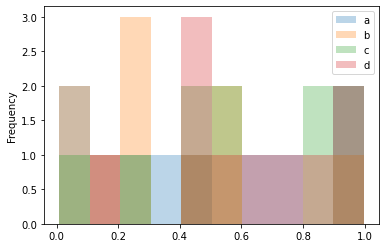

In [136]:
df2.plot.hist(alpha=.3)

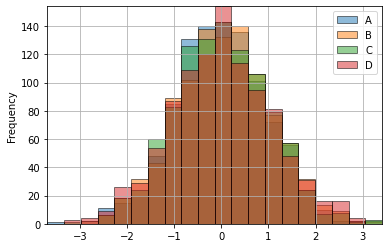

In [139]:
df1.plot.hist(bins=20, edgecolor='k', grid=True,
              alpha=.5).autoscale(enable=True, axis='both', tight=True)

<AxesSubplot:ylabel='Frequency'>

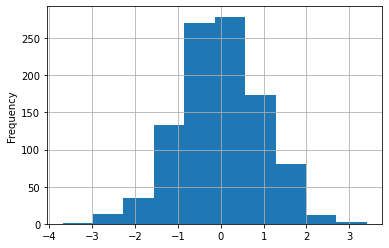

In [17]:
df1['A'].plot.hist(grid=True)

## Bar Plot (Discrete Data)

By default the index is the x-axis

In [96]:
df2['e2'] = df2['e']

In [97]:
df2.head()

,a,b,c,d,e,e2
0,0.039762,0.218517,0.103423,0.957904,x,x
1,0.937288,0.041567,0.899125,0.977680,y,y
2,0.780504,0.008948,0.557808,0.797510,x,x
3,0.672717,0.247870,0.264071,0.444358,z,z
4,0.053829,0.520124,0.552264,0.190008,y,y


<AxesSubplot:>

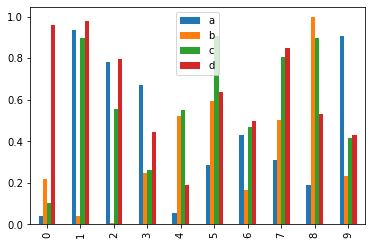

In [100]:
df2.plot.bar()

<AxesSubplot:>

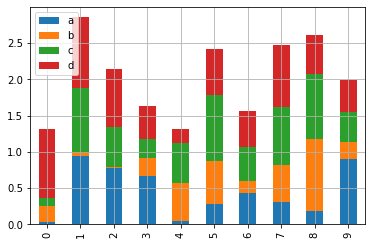

In [36]:
df2.plot.bar(stacked=True, grid=True)

## Line Plots

<AxesSubplot:>

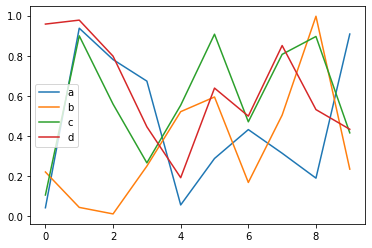

In [25]:
df2.plot.line()

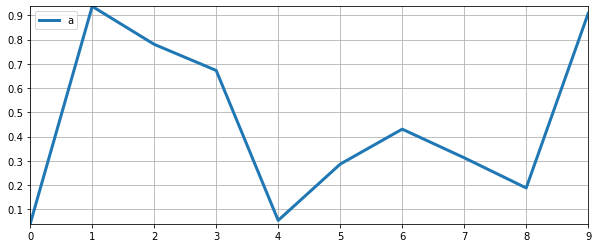

In [31]:
df2.plot.line(y='a', figsize=(10, 4), grid=True, lw=3).autoscale(enable=True,
                                                                 axis='both',
                                                                 tight=True)

## Area Plot
Cumme stacked line plots

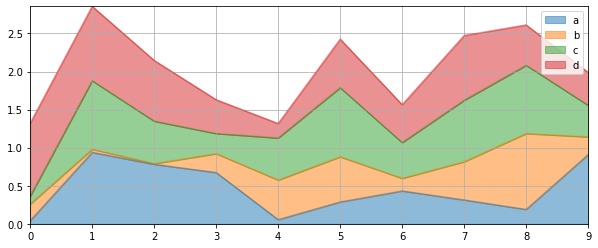

In [46]:
df2.plot.area(figsize=(10, 4), grid=True, alpha=0.5).autoscale(enable=True,
                                                               axis='both',
                                                               tight=True)

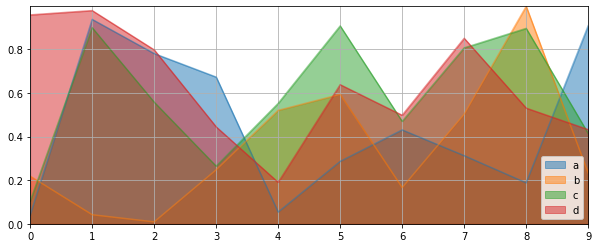

In [45]:
df2.plot.area(figsize=(10, 4), grid=True, alpha=0.5,
              stacked=False).autoscale(enable=True, axis='both', tight=True)

## Scatter Plot
Compare two variables

<AxesSubplot:xlabel='a', ylabel='b'>

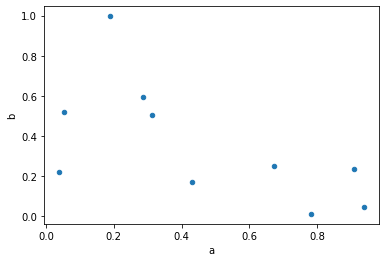

In [88]:
df2.plot.scatter(x='a', y='b')

<AxesSubplot:xlabel='a', ylabel='b'>

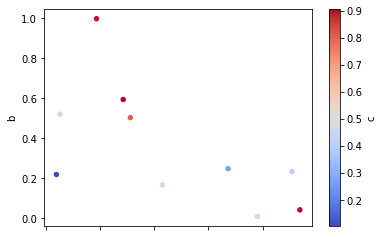

In [90]:
df2.plot.scatter(x='a', y='b', c='c', cmap='coolwarm')

<AxesSubplot:xlabel='a', ylabel='b'>

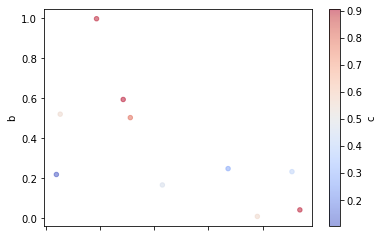

In [92]:
df2.plot.scatter(x='a', y='b', c='c', alpha=.5, cmap='coolwarm')

## Box Plot

In [75]:
print(df2.head(3))

          a         b         c         d  e
0  0.039762  0.218517  0.103423  0.957904  x
1  0.937288  0.041567  0.899125  0.977680  y
2  0.780504  0.008948  0.557808  0.797510  x


In [76]:
print(df2['e'].unique())

['x' 'y' 'z']


In [114]:
df2 = df2.drop('e2', axis=1)

In [125]:
df2.groupby(by='e').count()

,a,b,c,d
e,,,,
x,4,4,4,4
y,3,3,3,3
z,3,3,3,3


<AxesSubplot:>

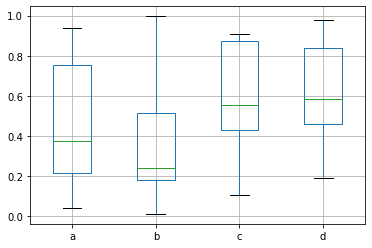

In [103]:
df2.boxplot()

array([[<AxesSubplot:title={'center':'a'}, xlabel='[e]'>,
        <AxesSubplot:title={'center':'b'}, xlabel='[e]'>],
       [<AxesSubplot:title={'center':'c'}, xlabel='[e]'>,
        <AxesSubplot:title={'center':'d'}, xlabel='[e]'>]], dtype=object)

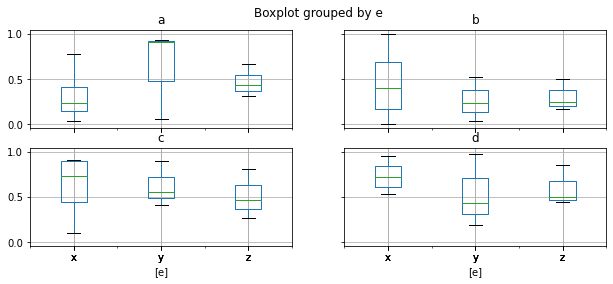

In [126]:
df2.boxplot(figsize=(10, 4), by='e')

In [130]:
rng = np.random.default_rng(42)

df = pd.DataFrame(rng.standard_normal((10, 2)), columns=['Col1', 'Col2'])
df['Col3'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'])
print(df)

       Col1      Col2 Col3
0  0.304717 -1.039984    A
1  0.750451  0.940565    A
2 -1.951035 -1.302180    A
3  0.127840 -0.316243    A
4 -0.016801 -0.853044    A
5  0.879398  0.777792    B
6  0.066031  1.127241    B
7  0.467509 -0.859292    B
8  0.368751 -0.958883  NaN
9  0.878450 -0.049926  NaN


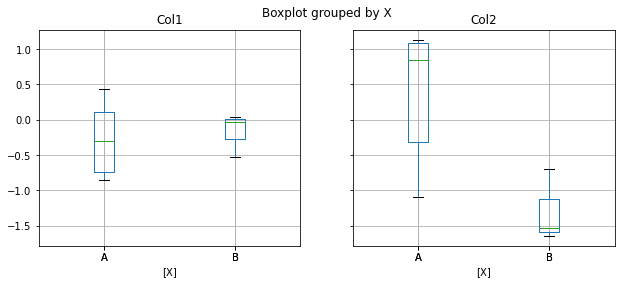

In [70]:
boxplot = df.boxplot(by='X', figsize=(10, 4))

<AxesSubplot:ylabel='Density'>

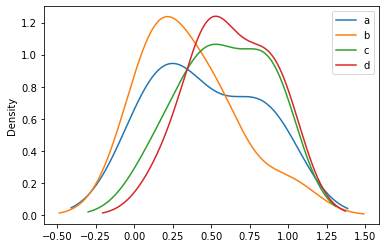

In [131]:
df2.plot.kde()

In [155]:
rng = np.random.default_rng(42)
df = pd.DataFrame(data=rng.standard_normal((1_000, 2)), columns=list('ab'))
print(df.head(3))

          a         b
0  0.304717 -1.039984
1  0.750451  0.940565
2 -1.951035 -1.302180


<AxesSubplot:xlabel='a', ylabel='b'>

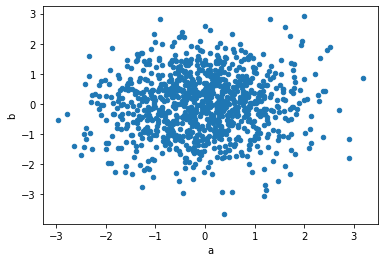

In [144]:
df.plot.scatter(x='a', y='b')

<AxesSubplot:xlabel='a', ylabel='b'>

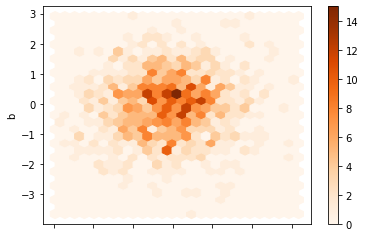

In [149]:
df.plot.hexbin(x='a', y='b', gridsize=25, cmap='Oranges')

## Customizing Plots with Pandas

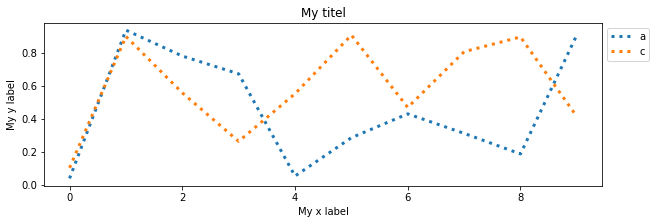

In [193]:
ax = df2[list('ac')].plot(figsize=(10, 3), ls=':', lw=3, title='My titel')
# c = 'blue'
ax.set(xlabel='My x label', ylabel='My y label')
ax.legend(bbox_to_anchor=(1, 1))
# loc = 0